In [1]:
!curl -s https://course.fast.ai/setup/colab 5 | bash

Updating fastai...
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
Done.


### Install Google Dependencies

In [2]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 19.2MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Download Harry Potter Corpus from Google Drive

In [4]:
download = drive.CreateFile({'id': '1ZHusJj4BkrPp_zOltAL1JjrFJBtXDXh9'})
download.GetContentFile('harry-potter.zip')
!unzip harry-potter.zip

Archive:  harry-potter.zip
   creating: harry-potter/
   creating: harry-potter/test/
   creating: harry-potter/train/
   creating: harry-potter/test/neg/
  inflating: harry-potter/test/neg/prisoner_of_azkaban.utf8.converted.txt  
   creating: harry-potter/test/pos/
  inflating: harry-potter/test/pos/philosophers_stone.utf8.converted.txt  
  inflating: harry-potter/test/pos/chamber_of_secrets.utf8.converted.txt  
   creating: harry-potter/train/neg/
  inflating: harry-potter/train/neg/Harry Potter 7 - Deathly Hollows.utf8.converted.txt  
  inflating: harry-potter/train/neg/Harry Potter 6 - The Half Blood Prince.utf8.converted.txt  
   creating: harry-potter/train/pos/
  inflating: harry-potter/train/pos/goblet_of_fire.utf8.converted.txt  
  inflating: harry-potter/train/pos/Harry Potter 5 - Order of the Phoenix.utf8.converted.txt  


In [0]:
!rm harry-potter/test/pos/philosophers_stone.utf8.converted.txt

# Harry Potter

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

## Language model

In [0]:
path = Path("/content/harry-potter")

In [0]:
bs=48

In [0]:
data_lm = (TextList.from_folder(path)
            .filter_by_folder(include=['train','test'])
            .split_by_folder(train='train', valid='test')
            .label_for_lm()           
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


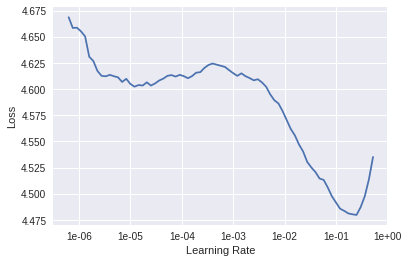

In [14]:
learn.recorder.plot(skip_end=15)

In [15]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.607690,3.533689,0.313759,02:04


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [19]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.305394,3.416705,0.332469,02:30
1,3.287961,3.321059,0.346658,02:30
2,3.075605,3.272425,0.352080,02:30
3,2.980029,3.246435,0.356211,02:30
4,2.742484,3.254727,0.355787,02:30


In [20]:
import math

perplexity = math.exp(3.254727)  # refer to valid_loss final epoch value
perplexity

25.91253944502484

In [0]:
learn.save('fine_tuned')

In [0]:
learn.save_encoder('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "Harry was surprised"
N_WORDS = 30
N_SENTENCES = 10

In [28]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

Harry was surprised to find that Cho had clearly considered his mood . Meanwhile , he had seen Cho 's face in the Hog 's Head ;
Harry was surprised to discover that the Death Eaters , however , had 
  come to a halt at the end of the front row and saw Harry and
Harry was surprised to find that Hermione had left the room . Hermione had just entered the room , apparently sure Harry had been enjoying this conversation all the time
Harry was surprised at how long Ron and Hermione had kept Malfoy in the Hall , because Malfoy was staying in the house , when Voldemort had
Harry was surprised to see that Hermione had just got the idea of telling him . He had heard rumors of a breakout from Azkaban in the Daily
Harry was surprised to find a way out of the Three Broomsticks when Ron and Hermione went back to Privet Drive , but it was impossible .
Harry was surprised when he asked Hermione about his scar . She thought he 's been wondering whether he could do it for him ? He had to buy his
Harry w

In [0]:
from google.colab import files

files.download('/content/harry-potter/models/fine_tuned.pth')